In [1]:
using CSV
using Plots
using DataFrames
using Statistics

In [2]:
df = CSV.read("Nikkei-2010-2012.csv", DataFrame)

,Ticker,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-12
,String7,Float64,Float64,Float64,Float64,Float64,Float64
1,4151.t,999.0,989.0,1003.0,984.0,991.0,984.0
2,4502.t,3850.0,3870.0,3870.0,3930.0,3900.0,3940.0
3,4503.t,694.0,700.0,700.0,700.0,702.0,700.0
4,4506.t,979.0,984.0,991.0,982.0,981.0,977.0
5,4507.t,2003.0,2007.0,2007.0,1957.0,1930.0,1931.0
6,4519.t,580.667,572.333,577.333,572.333,567.333,562.667
7,4523.t,3435.0,3425.0,3460.0,3440.0,3425.0,3410.0
8,4568.t,649.667,653.333,653.333,660.0,651.667,661.333
9,3105.t,861.0,868.0,873.0,856.0,886.0,890.0


In [3]:
Mᵗ = Matrix(df[:, 2:end])' #Here we transform our data frame into a matrix, without tickers and transpose it
Mᵨ = cor(Mᵗ) #We get the correlation matrix using an inbuilt function of Statistics

211×211 Matrix{Float64}:
  1.0          0.0921928   0.277986   …   0.0976897   0.254975    0.411108
  0.0921928    1.0         0.0384812      0.688403    0.254157    0.223988
  0.277986     0.0384812   1.0           -0.564465    0.688866    0.634702
  0.495838    -0.140545    0.686079      -0.468737    0.182145    0.346715
  0.262856     0.88       -0.0370028      0.774078    0.240944    0.185538
  0.406216     0.666366    0.532405   …   0.282068    0.723732    0.642227
  0.375985    -0.0737216   0.774044      -0.554811    0.55515     0.630731
  0.196407     0.696854   -0.459159       0.890004   -0.293889   -0.176088
  0.197529     0.650572   -0.521559       0.930219   -0.215855   -0.181033
  0.202926     0.721836   -0.340889       0.900819   -0.018973   -0.0391173
 -0.349348    -0.387432    0.264216   …  -0.566815   -0.024138    0.00642443
 -0.195306     0.492489   -0.405239       0.574641   -0.416829   -0.37605
 -0.0181654    0.429604   -0.543803       0.653212   -0.307274   -0.29122

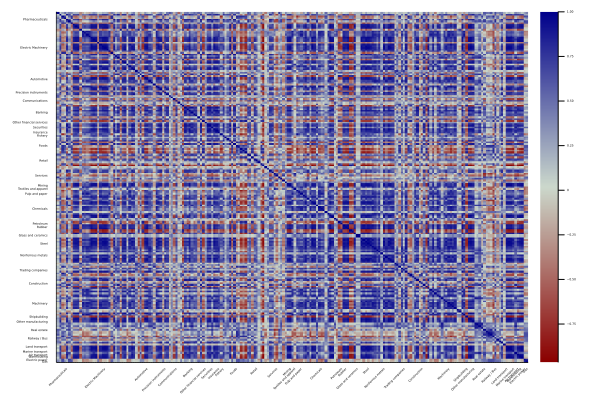

In [19]:
labels = [i == 5 ? "Pharmaceuticals" : i == 22 ? "Electric Machinery" : i == 41 ? "Automotive" :
          i ==  49 ? "Precision instruments" : i == 54 ? "Communications" : i == 61 ? "Banking" :
          i == 67 ? "Other financial services" : i == 70 ? "Securities" : i == 73 ? "Insurance" :
          i == 75 ? "Fishery" : i == 81 ? "Foods" : i == 90 ? "Retail" : i == 99 ? "Services" :
          i == 105 ? "Mining" : i == 107 ? "Textiles and apparel" : i == 110 ? "Pulp and paper" :
          i == 119 ? "Chemicals" : i == 128 ? "Petroleum" : i == 130 ? "Rubber" : i == 135 ? "Glass and ceramics" :
          i == 140 ? "Steel" : i == 147 ? "Nonferrous metals" : i == 156 ? "Trading companies" :
          i == 164 ? "Construction" : i == 176 ? "Machinery" : i == 184 ? "Shipbuilding" :
          i == 187 ? "Other manufacturing" : i == 192 ? "Real estate" : i == 197 ? "Railway / Bus" :
          i == 202 ? "Land transport" : i == 205 ? "Marine transport" : i == 207 ? "Air transport" :
          i == 208 ? "Warehousing" : i == 210 ? "Electric power" : i == 211 ? "Gas" : "" for i in 1:211]
heatmap(Mᵨ, xticks=(1:211, labels), yticks=(1:211, labels), fill_z=Mᵨ, xrotation = 45, seriescolor=cgrad(:redsblues),
        yflip = true, xtickfontsize=2, ytickfontsize=2)